Consider the dataset in the file Vertebral column 3C.dat, which contains 310 samples with 6 features
in three classes: NO (100), DH (60), and SL (150). Implement an MLP with two hidden layers.
Divide the whole dataset into a training set (70%) and test set (30%), train the neural network,
plot the loss and classification error versus the number of epochs during the train, and apply the
trained neural network to the test data, show the confusion matrix and classification error. You
can choose the number of nodes at two hidden layers.

In [4]:
#load and preprocess data

import pandas as pd
from sklearn.model_selection import train_test_split

columns = ['Pelvic incidence', 'Pelvic tilt', 'Lumbar lordosis angle',
           'Sacral slope', 'Pelvic radius', 'Grade of spondylolisthesis', 'Class']

# load the dataset into a pd df
file_path = 'Vertebral_column_3C.dat' 
data = pd.read_csv(file_path, delimiter=' ', names=columns)
data = data.dropna()

# replace class categories with 0, 1, 2 
data.loc[data["Class"] == "DH", "Class"] = 0
data.loc[data["Class"] == "SL", "Class"] = 1
data.loc[data["Class"] == "NO", "Class"] = 2
data["Class"] = data["Class"].astype(int)

X = data.drop("Class", axis=1)
y = data["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


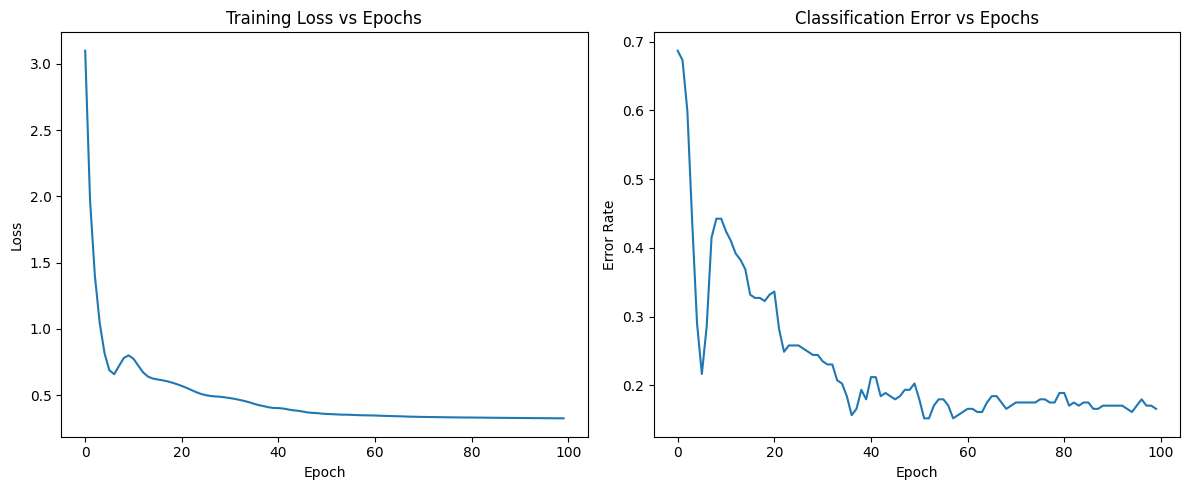

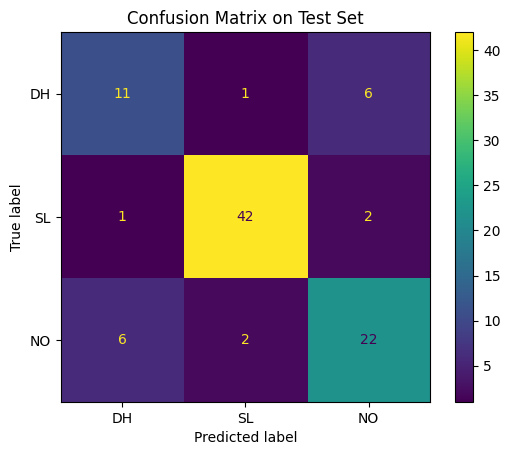

Test Classification Error: 0.1935


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score


# Convert data to tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

class MLP(nn.Module):
    def __init__(self, input_size=6, hidden1=12, hidden2=8, output_size=3):
        super(MLP, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, hidden1),
            nn.ReLU(),
            nn.Linear(hidden1, hidden2),
            nn.ReLU(),
            nn.Linear(hidden2, output_size)
        )

    def forward(self, x):
        return self.model(x)
    
model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 100
train_loss_history = []
train_error_history = []
for epoch in range(epochs):
    model.train()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    train_loss_history.append(loss.item())

    # Compute classification error
    _, predicted = torch.max(outputs, 1)
    error = 1 - accuracy_score(y_train_tensor.numpy(), predicted.numpy())
    train_error_history.append(error)

# Plot Loss and Error
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(train_loss_history)
plt.title("Training Loss vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(1,2,2)
plt.plot(train_error_history)
plt.title("Classification Error vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Error Rate")

plt.tight_layout()
plt.show()

# Evaluate on test data
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    _, test_predicted = torch.max(test_outputs, 1)

# Confusion Matrix and Error
cm = confusion_matrix(y_test_tensor.numpy(), test_predicted.numpy())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["DH", "SL", "NO"])
disp.plot()
plt.title("Confusion Matrix on Test Set")
plt.show()

test_error = 1 - accuracy_score(y_test_tensor.numpy(), test_predicted.numpy())
print(f"Test Classification Error: {test_error:.4f}")